In [4]:
from PIL import Image
import numpy as np
import os
import cv2

In [16]:
dataDir = 'L:/DATA/ISIS/keras_ocr/test_images/cropped/'
saveDir = 'L:/DATA/ISIS/keras_ocr/test_images/contrast/'
img_list = os.listdir(dataDir)
img_list.remove('annotations.txt')

In [17]:
# Change contrast and brightness
for img in img_list :
    im = cv2.imread(dataDir+img)
    alpha=1.8
    beta=-50
    im = alpha*im + beta
    cv2.imwrite(saveDir+img, im)

In [18]:
# Change the colors
black = (0,0,0)
white = (255,255,255)
threshold = (85,85,85)

for img in img_list :
    # Open input image in grayscale mode and get its pixels.
    image = Image.open(saveDir+img).convert("LA")
    pixels = image.getdata()
    newPixels = []

    # Compare each pixel 
    for pixel in pixels:
        if pixel < threshold:
            newPixels.append(black)
        else:
            newPixels.append(white)

    # Create and save new image.
    image = Image.new("RGB",image.size)
    image.putdata(newPixels)
    image.save(saveDir+img)

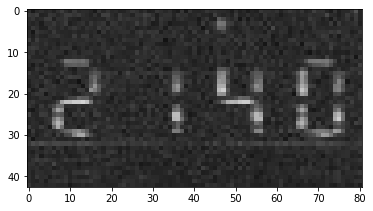

In [14]:
import matplotlib.pyplot as plt
# Let's see the difference
old = plt.imread('L:/DATA/ISIS/keras_ocr/test_images/cropped/52-5.jpg')
plt.imshow(old)

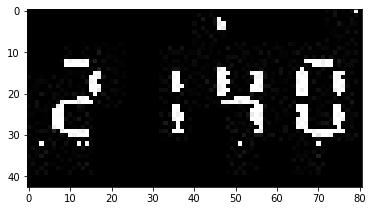

In [19]:
new = plt.imread('L:/DATA/ISIS/keras_ocr/test_images/contrast/52-5.jpg')
plt.imshow(new)